## Decision Tree Implementaion with PostPrunning & PrePrunning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [14]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#independent features
X = pd.DataFrame(iris['data'],columns=[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm']])
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = iris['target']

In [20]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=23)

In [21]:
# apply Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
treeClassifier = DecisionTreeClassifier(max_depth=2)

In [36]:
treeClassifier.fit(X_train,y_train)
y_pred = treeClassifier.predict(X_test)

#### Visualize the tree 

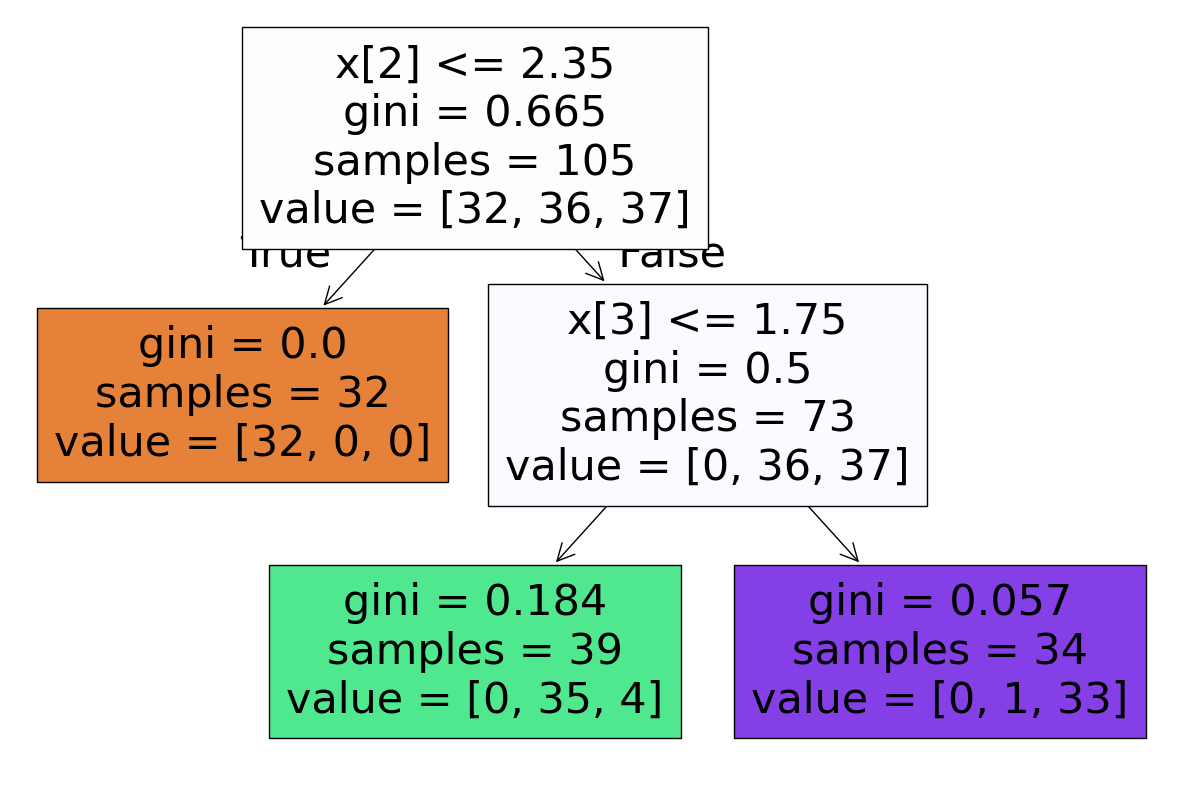

In [37]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier,filled=True)
plt.show()

### in above result we have to do post prunning to prevent model from overfitting 
we give our model max-depth parameter = 2 as there is more gap beteween values in node so no need to further split  

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



## Decision Tree Pre-prunning and Hyperparameter Tunning 
for Hyperparameter Tunning copy paste params---use link - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [41]:
params={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['sqrt', 'log2']
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
treemodel = DecisionTreeClassifier()

In [44]:
grid = GridSearchCV(treemodel,param_grid=params,cv=5,scoring='accuracy')

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [46]:
y_pred1 = grid.predict(X_test)

In [47]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[17  1  0]
 [ 0 12  2]
 [ 0  3 10]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.75      0.86      0.80        14
           2       0.83      0.77      0.80        13

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



In [48]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'random'}

In [49]:
grid.best_score_

np.float64(0.9714285714285715)